In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#from google.colab import files
#uploaded = files.upload()


In [2]:
# reading the csv file
dataset = pd.read_csv('museumdata.csv', sep=',', parse_dates=['Metadata Date'])


F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#info
print(dataset.shape)
print("")
dataset.info(null_counts=True)

(473427, 44)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473427 entries, 0 to 473426
Data columns (total 44 columns):
Object Number              473427 non-null object
Is Highlight               473427 non-null bool
Is Public Domain           473427 non-null bool
Object ID                  473427 non-null int64
Department                 473427 non-null object
Object Name                471522 non-null object
Title                      443364 non-null object
Culture                    206207 non-null object
Period                     88762 non-null object
Dynasty                    23134 non-null object
Reign                      11160 non-null object
Portfolio                  23035 non-null object
Artist Role                269363 non-null object
Artist Prefix              88961 non-null object
Artist Display Name        271457 non-null object
Artist Display Bio         232252 non-null object
Artist Suffix              11968 non-null object
Artist Alpha Sort          271423 no

### Initial Dropping of Columns
With a dataset of 473_427 entries, we dropped all empty columns and all columns with less than 100_000 entries.

In [4]:
#generating the list of bools to on columns to be dropped : True means drop, False means keep
dropping_bool = [value.count() < 100_000 for key, value in dataset.items()]

#zipping the column names against their bools
dropping_zip = zip(dataset.columns,dropping_bool)

#generating the list of columns to be dropped
dropping_cols = []
for a in dropping_zip:
    if a[1] == True:
        dropping_cols.append(a[0])

dropping_cols

['Period',
 'Dynasty',
 'Reign',
 'Portfolio',
 'Artist Prefix',
 'Artist Suffix',
 'Geography Type',
 'City',
 'State',
 'County',
 'Country',
 'Region',
 'Subregion',
 'Locale',
 'Locus',
 'Excavation',
 'River',
 'Rights and Reproduction']

In [5]:
dataset = dataset.drop(dropping_cols, axis=1)

In [6]:
#new info
print(dataset.shape)
print("")
dataset.info(null_counts=True)

(473427, 26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473427 entries, 0 to 473426
Data columns (total 26 columns):
Object Number          473427 non-null object
Is Highlight           473427 non-null bool
Is Public Domain       473427 non-null bool
Object ID              473427 non-null int64
Department             473427 non-null object
Object Name            471522 non-null object
Title                  443364 non-null object
Culture                206207 non-null object
Artist Role            269363 non-null object
Artist Display Name    271457 non-null object
Artist Display Bio     232252 non-null object
Artist Alpha Sort      271423 non-null object
Artist Nationality     182498 non-null object
Artist Begin Date      234741 non-null object
Artist End Date        232458 non-null object
Object Date            458504 non-null object
Object Begin Date      473427 non-null int64
Object End Date        473427 non-null int64
Medium                 466255 non-null object
Dimensio

In [7]:
dataset.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,...,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,The American Wing,Coin,One-dollar Liberty Head Coin,NaN,Maker,James Barton Longacre,...,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/1,NaT,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,The American Wing,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,Christian Gobrecht,...,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Metal,http://www.metmuseum.org/art/collection/search/2,NaT,"Metropolitan Museum of Art, New York, NY",NaN
2,67.265.9,False,False,3,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/3,NaT,"Metropolitan Museum of Art, New York, NY",NaN
3,67.265.10,False,False,4,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/4,NaT,"Metropolitan Museum of Art, New York, NY",NaN
4,67.265.11,False,False,5,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/5,NaT,"Metropolitan Museum of Art, New York, NY",NaN


In [8]:
#checking for duplicates
dataset = dataset.drop_duplicates()


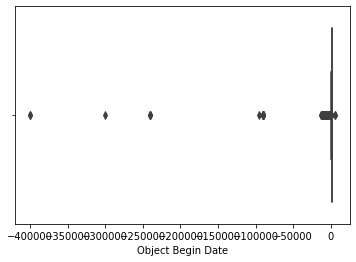

In [9]:

#checking for some outliers
sns.boxplot(x=dataset['Object Begin Date'])
dataset= dataset[dataset['Object Begin Date']>1500]





(359977, 26)

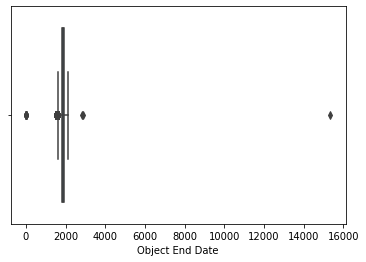

In [10]:
sns.boxplot(x=dataset['Object End Date'])  
dataset= dataset[dataset['Object End Date']>1500]
dataset.shape

In [ ]:
dataset.shape